# **Intersection Analysis**

This notebook contains the necessary code to identify the genes shared between **Xenium Human Immuno-Oncology**, the differentially expressed genes in the **Tumors FA**, and **Pablos's list proteins**.

In [1]:
# Libraries to import

import pandas as pd
import matplotlib.pyplot as plt
from matplotlib_venn import venn2 
from matplotlib_venn import venn3

In [2]:
# Genes in RNAseq from FA SCC tumors
# Read genes from a file
df_fascc = pd.read_csv("FA_SCC_filtered_up_genes.csv")
df_fascc.head()

,gene_id,gene_symbol,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
0,677767,SCARNA7,210.144719,13.371022,0.687271,19.455245,2.630926e-84,2.862155e-81
1,692148,SCARNA10,373.274780,13.213866,0.644258,20.510219,1.745079e-93,2.835368e-90
2,160419,C12orf50,45.452131,12.696482,0.709369,17.898287,1.216051e-71,6.435866e-69
3,6144,RPL21,323.541603,12.303302,0.435228,28.268630,8.401888e-176,8.226288e-172
4,8362,H4C12,26.035134,12.225548,0.611394,19.996174,5.946264e-89,7.277483e-86


In [3]:
# RNAseq genes
rnaseq_genes = df_fascc['gene_symbol'].tolist()


In [4]:
# Xenium genes
# Read genes from a file
df_xenium = pd.read_csv("Xenium_hIO_v1_metadata.csv")
df_xenium.head()

,Gene,Ensemble ID,Num_Probesets,Codewords,Annotation
0,A2M,ENSG00000175899,2,1,NaN
1,ACE2,ENSG00000130234,8,1,Hormone Processing
2,ACTA2,ENSG00000107796,8,1,Stromal Cell
3,ACTB,ENSG00000075624,2,1,Cytoskeleton
4,ADAM28,ENSG00000042980,4,1,B cell


In [5]:
xenium_genes = df_xenium['Gene'].tolist()

In [4]:
# Antibody list
genes_ab = [
    "ITGB3", "MMP1", "MMP2", "MMP7", "MMP8", "MMP11", "MMP13", "MMP14",
    "MMP17", "MMP19", "MMP28", "TIMP3", "COL1A1", "FN1"
]

print(len(genes_ab))  # 14 genes

14


In [6]:
# Protein list 
proteins = [
    "TIMP1","COL1A1","FAP1","FN1","VIM","COL4A1","MMP9","PANCK","TNC","ACTA2"
]
print(len(proteins))  # 10 proteins

10


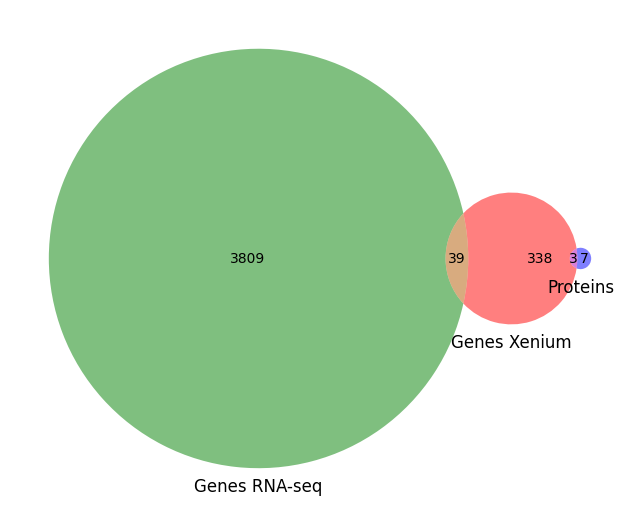

In [7]:
# Make list to contains 
set1 = set(xenium_genes)
set2 = set(rnaseq_genes)
set3 = set(proteins)

# PLot Venn diagram
plt.figure(figsize=(8,8))
venn3([set1, set2, set3], set_labels=('Genes Xenium', 'Genes RNA-seq', 'Proteins'), alpha=0.5)

# Show plot
#plt.title("Intersection of genes between the two methodologies and antibodies")
plt.show()

In [ ]:
# Print intersections
print("Intersection between Xenium and RNA-seq:", set1.intersection(set2))
print("Intersection between Xenium and Proteins:", set1.intersection(set3))
print("Intersection between RNA-seq and Proteins:", set2.intersection(set3))
print("Intersection between the three sets:", set1.intersection(set2).intersection(set3))


Intersection between Xenium and RNA-seq: {'IFIT2', 'PTEN', 'IL1A', 'KRAS', 'BRAF', 'ORC6', 'CDK12', 'IL10', 'VEGFA', 'MKI67', 'KLRD1', 'CCL16', 'CXCL3', 'CENPF', 'CD274', 'NF1', 'IL1R1', 'MIS18BP1', 'ITGA1', 'MGP', 'IL13RA2', 'NT5E', 'AREG', 'VCAN', 'FAS', 'ATM', 'IL7R', 'CDK6', 'FGF2', 'KMT2C', 'EGFR', 'CXCL2', 'IL1B', 'CEACAM8', 'HIF1A', 'CDK1', 'PIK3CA', 'MET', 'NOTCH2'}
Intersection between Xenium and Proteins: {'MMP9', 'ACTA2', 'FN1'}
Intersection between RNA-seq and Proteins: set()
Intersection between the three sets: set()


In [18]:
# Save a file with the intersection genes for each pair and the three sets in one file
# and print a number of genes in each intersection
with open("gene_intersections.txt", "w") as f:
    f.write("Intersection between Xenium and RNA-seq:\n")
    f.write(f"Number of genes in intersection: {len(set1.intersection(set2))}\n")
    f.write(", ".join(set1.intersection(set2)) + "\n\n")
    
    
    f.write("Intersection between Xenium and Proteins:\n")
    f.write(f"Number of genes in intersection: {len(set1.intersection(set3))}\n")
    f.write(", ".join(set1.intersection(set3)) + "\n\n")
    
    
    f.write("Intersection between RNA-seq and Proteins:\n")
    f.write(f"Number of genes in intersection: {len(set2.intersection(set3))}\n")
    f.write(", ".join(set2.intersection(set3)) + "\n\n")
    
    
    f.write("Intersection between the three sets:\n")
    f.write(f"Number of genes in intersection: {len(set1.intersection(set2).intersection(set3))}\n")
    f.write(", ".join(set1.intersection(set2).intersection(set3)) + "\n")
    

print("Intersections saved to gene_intersections.txt")

Intersections saved to gene_intersections.txt


Session Info:

In [10]:
# Información de la sesión
!python --version

Python 3.12.1


In [11]:
!pip list

Package                   Version
------------------------- ---------
adjustText                1.0.4
asttokens                 2.4.1
attrs                     25.3.0
certifi                   2025.4.26
charset-normalizer        3.4.2
colorama                  0.4.6
comm                      0.2.2
contourpy                 1.2.0
cycler                    0.12.1
debugpy                   1.8.2
decorator                 5.1.1
docopt                    0.6.2
et_xmlfile                2.0.0
executing                 2.0.1
fastjsonschema            2.21.1
fonttools                 4.47.2
ftpretty                  0.4.0
goatools                  1.4.12
gseapy                    1.1.8
idna                      3.10
ipykernel                 6.29.5
ipython                   8.26.0
jedi                      0.19.1
joblib                    1.4.2
jsonschema                4.23.0
jsonschema-specifications 2025.4.1
jupyter_client            8.6.2
jupyter_core              5.7.2
kiwisolver         


[notice] A new release of pip is available: 23.2.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip
